** Implement Feed Forward**

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
class Perceptron:
    
    def __init__(self, num_inputs):
        self.weights = []
        self.num_inputs = num_inputs
        for _ in range(0, num_inputs):
            self.weights.append(random.random() * 2 - 1)
        print(self.weights)

    def feed_forward(self, inputs):
        self.inputs = inputs
        
        sum = 0
        for i in range(0, self.num_inputs):
            sum += self.weights[i] * inputs[i]

        self.output = self.activate(sum)
        return self.output

    def activate(self, x):
        if x > 0:
            return 1
        return 0

In [ ]:
a = Perceptron(5)

In [ ]:
a.feed_forward([1, 2, 3, 4, 5])

** Define the Line**

In [ ]:
def line(x):
    return 0.5 * x

In [ ]:
def graph(formula):  
    x = np.array(range(0, 1000))
    y = formula(x)
    plt.plot(x, y)
    plt.xlim(0, 1000), plt.ylim(0, 1000)
    plt.show()

In [ ]:
graph(line)

**Test for Point with Line**

In [ ]:
p = Perceptron(2)

In [ ]:
x_coord = random.random() * 1000
y_coord = random.random() * 1000
line_y = line(x_coord)

print(x_coord, y_coord)
print(x_coord, line_y)

if y_coord > line_y:
    answer = 1
else:
    answer = 0
    
print(answer)

In [ ]:
correct = 0

for _ in range(0,1000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    is_above = y_coord > line_y
    guess_above = p.feed_forward([x_coord, y_coord])
    
    if (is_above == True and guess_above >= 0.5):
        correct += 1
    if (is_above == False and guess_above < 0.5):
        correct += 1

print(correct)

**Implement Back Propagation**

In [13]:
#Modified from above
class Perceptron:
    
    def __init__(self, num_inputs):
        self.weights = []
        self.num_inputs = num_inputs
        for _ in range(0, num_inputs):
            self.weights.append(random.random() * 2 - 1)
        print(self.weights)

    def feed_forward(self, inputs):
        self.inputs = inputs
        
        sum = 0
        for i in range(0, self.num_inputs):
            sum += self.weights[i] * inputs[i]

        self.output = self.activate(sum)
        return self.output

    def activate(self, x):
        if x > 0:
            return 1
        return 0
    
    def backward_pass(self, error):
        learning_rate = 0.01 # hyperparameter
        for i in range(0, self.num_inputs):
            self.weights[i] -= error * self.inputs[i] * learning_rate
    
    def get_weights(self):
        return self.weights

In [ ]:
p = Perceptron(2)

In [ ]:
print(p.get_weights())

for _ in range(0, 10000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    if y_coord > line_y:
        answer = 1
    else:
        answer = 0
    
    guess = p.feed_forward([x_coord, y_coord])
    p.backward_pass(guess - answer)
    
print(p.get_weights())

**Graph Results**

In [ ]:
# Modified from above
def graph(formula, weights=[]):  
    x = np.array(range(0, 1000))
    y = formula(x)
    plt.plot(x, y)
    
    if len(weights) == 2:
        y2 = (-weights[0] / weights[1]) * x
        plt.plot(x, y2)
    
    plt.xlim(0, 1000), plt.ylim(0, 1000)
    plt.show()

In [ ]:
graph(line, [-19.56805979028088, 5.751733481531401])

**Line with Bias**

In [14]:
def line(x):
    return 0.5 * x + 500

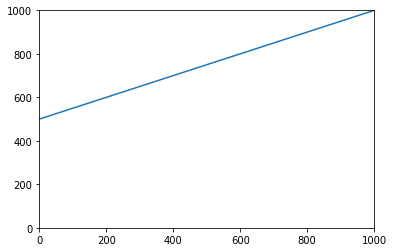

In [15]:
graph(line)

Try optimizing this with the current 2-input Perceptron

**Implement Bias**

In [164]:
p = Perceptron(3)

[0.10627913462087979, 0.03666328157163057, -0.8696577734425568]


In [165]:
# Modified from above
from IPython import display
import pylab as pl

def graph(formula, weights=[]):
    plt.clf()
    x = np.array(range(0, 1000))
    y = formula(x)
    plt.plot(x, y)
    
    if len(weights) == 2:
        y2 = (-weights[0] / weights[1]) * x
        plt.plot(x, y2)
        
    if len(weights) == 3:
        y2 = (-weights[0] / weights[1]) * x - (weights[2] / weights[1])
        plt.plot(x, y2)
    
    plt.xlim(0, 1000), plt.ylim(0, 1000)
    display.display(pl.gcf())
    display.clear_output(wait=True)

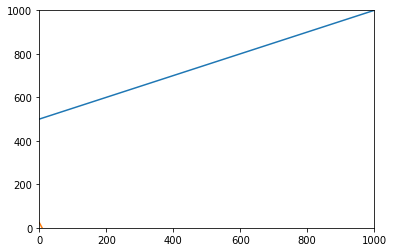

In [166]:
graph(line, p.get_weights())

In [170]:
#Modified from above
correct = 0

for _ in range(0,1000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    is_above = y_coord > line_y
    guess_above = p.feed_forward([x_coord, y_coord, 1])
    
    if (is_above == True and guess_above >= 0.5):
        correct += 1
    if (is_above == False and guess_above < 0.5):
        correct += 1

print(correct)

990


[-19.815261771600923, 36.175675609834016, -17177.00965795771]


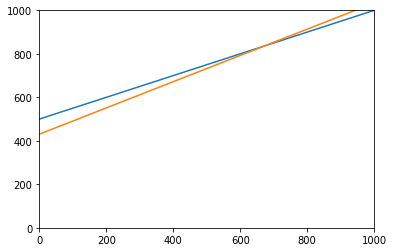

In [169]:
#Modified from above
print(p.get_weights())

for i in range(0, 100000000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    if y_coord > line_y:
        answer = 1
    else:
        answer = 0
    
    guess = p.feed_forward([x_coord, y_coord, 1])
    p.backward_pass(guess - answer)
        
    if i % 100000 == 0:
        graph(line, p.get_weights())
    
print(p.get_weights())

**Input Normalization**

In [233]:
p = Perceptron(3)

[0.9030310356758318, -0.7215011889549581, 0.04429049265388407]


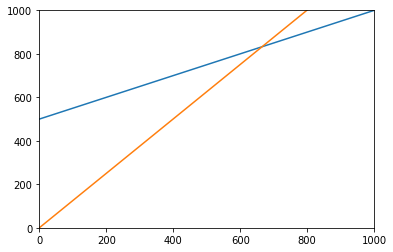

In [234]:
graph(line, p.get_weights())

In [237]:
#Modified from above
correct = 0

for _ in range(0,1000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    x_coord_norm = x_coord / 1000
    y_coord_norm = y_coord / 1000
    
    is_above = y_coord > line_y
    guess_above = p.feed_forward([x_coord_norm, y_coord_norm, 1])
    
    if (is_above == True and guess_above >= 0.5):
        correct += 1
    if (is_above == False and guess_above < 0.5):
        correct += 1

print(correct)

997


[-0.07705697890516727, 0.15291340468688674, -0.07570950734611594]


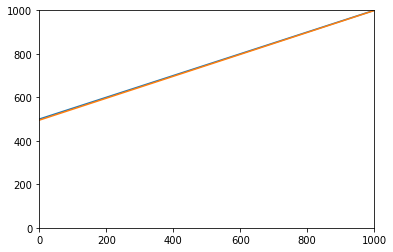

In [236]:
#Modified from above
print(p.get_weights())

for i in range(0, 10000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    x_coord_norm = x_coord / 1000
    y_coord_norm = y_coord / 1000
    
    if y_coord > line_y:
        answer = 1
    else:
        answer = 0
    
    guess = p.feed_forward([x_coord_norm, y_coord_norm, 1])
    p.backward_pass(guess - answer)
    
    if i % 100 == 0:
        w = p.get_weights().copy()
        w[-1] = w[-1] * 1000
        graph(line, w)
    
print(p.get_weights())

**Logical AND and OR**

In [277]:
a = Perceptron(3)

[0.29543212526446827, 0.8275084905441301, -0.4436670042916313]


In [280]:
print("Logical AND")
print(a.feed_forward([1, 1, 1]))
print(a.feed_forward([1, 0, 1]))
print(a.feed_forward([0, 1, 1]))
print(a.feed_forward([0, 0, 1]))

Logical AND
1
0
0
0


In [279]:
for _ in range(0,1000):
    first = random.choice([0, 1])
    second = random.choice([0, 1])
    a_out = a.feed_forward([first, second, 1])
    
    if (first and second):
        answer = 1
    else:
        answer = 0
    a.backward_pass(a_out - answer)
    
print(a.get_weights())

[0.29543212526446827, 0.6275084905441299, -0.6436670042916315]


In [269]:
# Modified from above
from IPython import display
import pylab as pl

def graph(formula, weights=[], size=1000):
    plt.clf()
    x = np.array(range(0, size))
    if size == 1:
        x = np.arange(0, size, .01)
    y = formula(x)
    plt.plot(x, y)
    
    if len(weights) == 2:
        y2 = (-weights[0] / weights[1]) * x
        plt.plot(x, y2)
        
    if len(weights) == 3:
        y2 = (-weights[0] / weights[1]) * x - (weights[2] / weights[1])
        plt.plot(x, y2)
    
    plt.xlim(0, size), plt.ylim(0, size)
    display.display(pl.gcf())
    display.clear_output(wait=True)

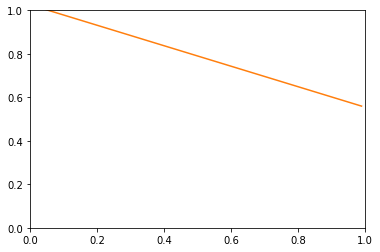

In [281]:
graph(line, a.get_weights(), size=1)

In [295]:
b = Perceptron(3)

[-0.18923118637178127, 0.9056137514888873, 0.22100557748683358]


In [296]:
print("Logical OR")
print(b.feed_forward([1, 1, 1]))
print(b.feed_forward([1, 0, 1]))
print(b.feed_forward([0, 1, 1]))
print(b.feed_forward([0, 0, 1]))

Logical OR
1
1
1
1


In [297]:
for _ in range(0,1000):
    first = random.choice([0, 1])
    second = random.choice([0, 1])
    b_out = b.feed_forward([first, second, 1])
    
    if (first or second):
        answer = 1
    else:
        answer = 0
    b.backward_pass(b_out - answer)
    
print(b.get_weights())

[0.010768813628218766, 0.9056137514888873, -0.008994422513166478]


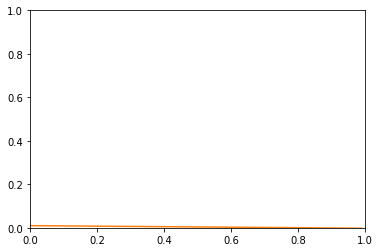

In [298]:
graph(line, b.get_weights(), size=1)

**XOR with 2 Perceptrons**

In [404]:
a = Perceptron(3)
b = Perceptron(4)

[0.3396846050617881, 0.24252979675626563, -0.005778131976126311]
[-0.05957581809648693, -0.18670489951449754, -0.5669880081788032, -0.020868857746876524]


In [405]:
def network(first, second):
    a_out = a.feed_forward([first, second, 1])
    b_out = b.feed_forward([first, a_out, second, 1])
    return b_out

In [408]:
print(network(1, 1))
print(network(1, 0))
print(network(0, 1))
print(network(0, 0))

0
1
1
0


In [343]:
#Modified from above
class Perceptron:
    
    def __init__(self, num_inputs):
        self.weights = []
        self.num_inputs = num_inputs
        for _ in range(0, num_inputs):
            self.weights.append(random.random() * 2 - 1)
        print(self.weights)

    def feed_forward(self, inputs):
        self.inputs = inputs
        
        sum = 0
        for i in range(0, self.num_inputs):
            sum += self.weights[i] * inputs[i]

        self.output = self.activate(sum)
        return self.output

    def activate(self, x):
        if x > 0:
            return 1
        return 0
    
    def backward_pass(self, error):
        learning_rate = 0.01 # hyperparameter
        back_error = []
        for i in range(0, self.num_inputs):
            back_error.append(error * self.weights[i])
            self.weights[i] -= error * self.inputs[i] * learning_rate
        return back_error
    
    def get_weights(self):
        return self.weights

In [407]:
for _ in range(0,1000):
    first = random.choice([0, 1])
    second = random.choice([0, 1])
    
    a_out = a.feed_forward([first, second, 1])
    b_out = b.feed_forward([first, a_out, second, 1])
    
    if (first != second):
        answer = 1
    else:
        answer = 0
        
    back_error = b.backward_pass(b_out - answer)
    a.backward_pass(back_error[1])
    
print(a.get_weights())
print(b.get_weights())

[0.3263164090812082, 0.25628308192619154, -0.019912229966416256]
[-0.019575818096486924, 0.23329510048550256, -0.21698800817880293, -0.0008688577468765231]


**XOR with 3 Perceptrons**

In [360]:
a = Perceptron(3)
b = Perceptron(3)
c = Perceptron(3)

[-0.9060909691995083, -0.8396727866613862, 0.8670974138325274]
[-0.7903703175883345, -0.25264914886399636, 0.2055522551052451]
[-0.9547053142489783, 0.33788439995699093, -0.03749374516832882]


In [361]:
def network(first, second):
    a_out = a.feed_forward([first, second, 1])
    b_out = b.feed_forward([first, second, 1])
    c_out = c.feed_forward([a_out, b_out, 1])
    return c_out

In [364]:
print(network(1, 1))
print(network(1, 0))
print(network(0, 1))
print(network(0, 0))

0
1
1
0


In [363]:
for _ in range(0,1000000):
    first = random.choice([0, 1])
    second = random.choice([0, 1])
    c_out = network(first, second)
    
    if (first != second):
        answer = 1
    else:
        answer = 0
        
    back_error = c.backward_pass(c_out - answer)
    a.backward_pass(back_error[0])
    b.backward_pass(back_error[1])
    
print(a.get_weights())
print(b.get_weights())
print(c.get_weights())

[-0.7339970560698764, -0.7409082455291834, 0.7642562544050576]
[-0.865208701572851, -0.29713562485152334, 0.25268878710395487]
[0.015294685751022392, -0.022115600043009234, -0.007493745168328807]


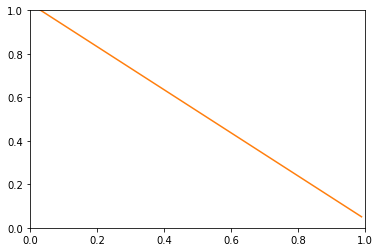

In [365]:
graph(line, a.get_weights(), size=1)

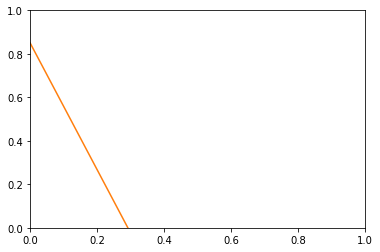

In [366]:
graph(line, b.get_weights(), size=1)

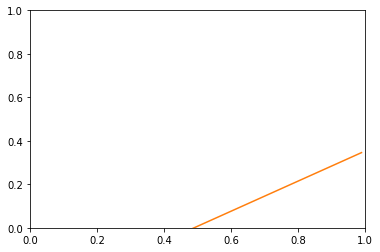

In [367]:
graph(line, c.get_weights(), size=1)

**Parabola - Non-linear activation**

In [368]:
def parabola(x):
    return 0.005 * pow(x - 500, 2) + 250

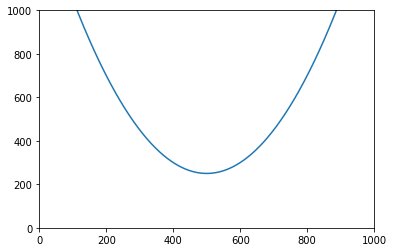

In [369]:
graph(parabola)

In [383]:
a = Perceptron(3, act='sigmoid')
b = Perceptron(3, act='sigmoid')
c = Perceptron(3, act='sigmoid')

def network(first, second):
    a_out = a.feed_forward([first, second, 1])
    b_out = b.feed_forward([first, second, 1])
    c_out = c.feed_forward([a_out, b_out, 1])
    return c_out

[-0.9018061885208539, -0.6070839229460125, 0.5944619820191239]
[0.18850649643752848, 0.025242870901806214, -0.9932353325299224]
[0.5503966407290812, -0.2683264781866046, -0.2399859729541285]


In [386]:
correct = 0

for _ in range(0,1000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    curve_y = parabola(x_coord)
    x_norm = x_coord / 1000
    y_norm = y_coord / 1000
    
    is_above = y_coord > curve_y
    guess_above = network(x_norm, y_norm)
    
    if (is_above == True and guess_above >= 0.5):
        correct += 1
    if (is_above == False and guess_above < 0.5):
        correct += 1

print(correct)

976


In [390]:
for _ in range(0,1000000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    curve_y = parabola(x_coord)
    x_norm = x_coord / 1000
    y_norm = y_coord / 1000

    c_out = network(x_norm, y_norm)
    
    if y_coord > curve_y:
        answer = 1
    else:
        answer = 0

    back_error = c.backward_pass(c_out - answer)
    a.backward_pass(back_error[0])
    b.backward_pass(back_error[1])
    
print(a.get_weights())
print(b.get_weights())
print(c.get_weights())

[-12.474348443313602, -5.084275184049197, 6.451473619935524]
[12.388689646694768, -5.126039559910979, -5.875989630522441]
[-14.387589128529227, -14.118700360720467, 8.175707532748401]


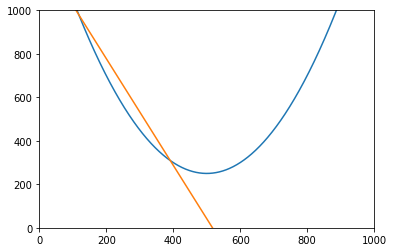

In [395]:
w = a.get_weights().copy()
w[-1] = w[-1] * 1000
graph(parabola, w)

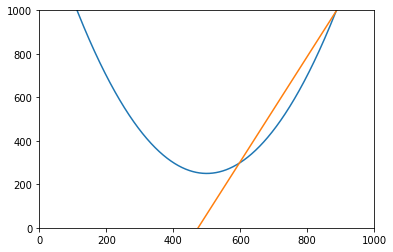

In [396]:
w = b.get_weights().copy()
w[-1] = w[-1] * 1000
graph(parabola,w)

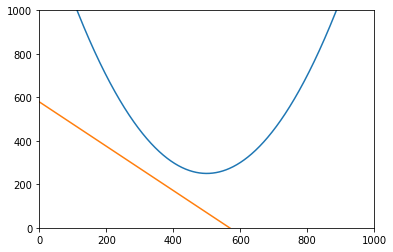

In [397]:
w = c.get_weights().copy()
w[-1] = w[-1] * 1000
graph(parabola,w)

In [398]:
print('%f' % c.feed_forward([1, 1, 1]))
print('%f' % c.feed_forward([1, 0, 1]))
print('%f' % c.feed_forward([0, 1, 1]))
print('%f' % c.feed_forward([0, 0, 1]))

0.000000
0.002001
0.002617
0.999719


In [382]:
class Perceptron:
    
    def __init__(self, num_inputs, act='step'):
        self.weights = []
        self.num_inputs = num_inputs
        self.act = act # define activation function
        for _ in range(0, num_inputs):
            self.weights.append(random.random() * 2 - 1)
        print(self.weights)
            
    def get_weights(self):
        return self.weights
        
    def feed_forward(self, inputs):
        self.inputs = inputs
        sum = 0
                # multiply inputs by weights and sum them
        for i in range(0, self.num_inputs):
            sum += self.weights[i] * inputs[i]
            
        # 'activate' the sum and get the derivative
        self.output, self.output_prime = self.activate(sum)
        return self.output
    
    def activate(self, x):
        if (self.act == 'sigmoid'):
            activation = self.sigmoid(x)
            activation_prime = activation * (1 - activation)
        else:
            activation = self.step(x)
            activation_prime = 1 # use 1 since step activation is not differentiable
        return activation, activation_prime
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def step(self, x):
        if x > 0:
            return 1
        return 0
    
    def backward_pass(self, error):
        learning_rate = 0.01 # hyperparameter
        back_error = [] # each element in list represent amount of error to send backward along that connection
        for i in range(0, self.num_inputs):
            back_error.append(error * self.output_prime * self.weights[i])
            self.weights[i] -= error * self.output_prime * self.inputs[i] * learning_rate
        return back_error